<h1> Import The Libraries </h1>

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from scipy.stats import skew


<h1> Explore The Data </h1>

In [2]:
df = pd.read_excel('Online Retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [4]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 536641 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    536641 non-null  object        
 1   StockCode    536641 non-null  object        
 2   Description  535187 non-null  object        
 3   Quantity     536641 non-null  int64         
 4   InvoiceDate  536641 non-null  datetime64[ns]
 5   UnitPrice    536641 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      536641 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.8+ MB


In [7]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
numeric_df.describe()

,Quantity,UnitPrice,CustomerID
count,536641.000000,536641.000000,401604.000000
mean,9.620029,4.632656,15281.160818
std,219.130156,97.233118,1714.006089
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13939.000000
50%,3.000000,2.080000,15145.000000
75%,10.000000,4.130000,16784.000000
max,80995.000000,38970.000000,18287.000000


In [12]:
df = df[(df["Quantity"] > 0) & (df["UnitPrice"] > 0)]
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392692 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  object        
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  float64       
 7   Country      392692 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.0+ MB


In [13]:
df['TotalAmount'] = df['Quantity'] * df['UnitPrice']
df.drop(columns=["Quantity","UnitPrice"],inplace=True)

In [ ]:
# Calculate skewness
skew_value = skew(df['TotalAmount'])
print(f"Skewness of TotalAmount: {skew_value:.2f}")

Skewness of TotalAmount: 448.52


In [37]:
# Clip
q_low = df['TotalAmount'].quantile(0.1)
q_high = df['TotalAmount'].quantile(0.9)
df['TotalAmount'] = df['TotalAmount'].clip(q_low, q_high)

In [38]:
# Calculate skewness
skew_value = skew(df['TotalAmount'])
print(f"Skewness of TotalAmount: {skew_value:.2f}")

Skewness of TotalAmount: 0.78


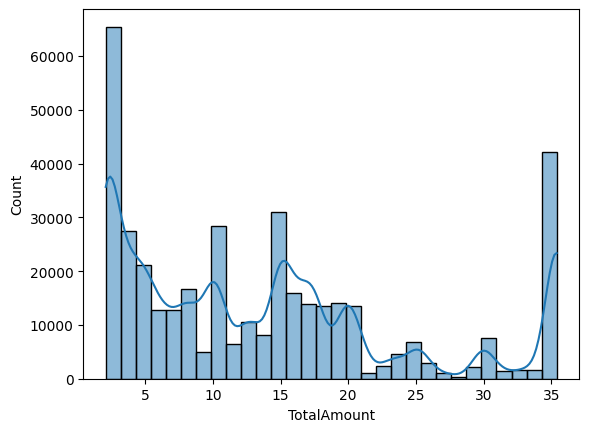

In [40]:
# Plot Histogram
sns.histplot(df['TotalAmount'], bins=30, kde=True)  
plt.show()

In [41]:
df["TotalAmount"].describe()

count    392692.000000
mean         13.961420
std          10.502758
min           2.080000
25%           4.950000
50%          12.450000
75%          19.800000
max          35.400000
Name: TotalAmount, dtype: float64

In [14]:
for col in df.select_dtypes(include="object"):
    print(df[col].value_counts())

InvoiceNo
576339    542
579196    533
580727    529
578270    442
573576    435
         ... 
544170      1
556842      1
556831      1
556817      1
542591      1
Name: count, Length: 18532, dtype: int64
StockCode
85123A    2023
22423     1713
85099B    1615
84879     1395
47566     1389
          ... 
90059A       1
20678        1
90059D       1
90168        1
23843        1
Name: count, Length: 3665, dtype: int64
Description
WHITE HANGING HEART T-LIGHT HOLDER    2016
REGENCY CAKESTAND 3 TIER              1713
JUMBO BAG RED RETROSPOT               1615
ASSORTED COLOUR BIRD ORNAMENT         1395
PARTY BUNTING                         1389
                                      ... 
GREEN WITH METAL BAG CHARM               1
WHITE WITH METAL BAG CHARM               1
BLUE/NAT SHELL NECKLACE W PENDANT        1
PINK EASTER HENS+FLOWER                  1
PAPER CRAFT , LITTLE BIRDIE              1
Name: count, Length: 3877, dtype: int64
Country
United Kingdom          349203
Germany         

In [15]:
reference_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)
reference_date

Timestamp('2011-12-10 12:50:00')

In [42]:
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',                                    # Frequency
    'TotalAmount': 'sum'                                       # Monetary
}).reset_index()

rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']
rfm.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,1,35.40
1,12347.0,2,7,3646.97
2,12348.0,75,4,960.68
3,12349.0,19,1,1388.60
4,12350.0,310,1,329.80


In [62]:
X_scaled = StandardScaler().fit_transform(rfm)

<h1> Apply KMeans </h1>

In [63]:
# Selecting the optimal number of clusters using Elbow Method and Silhouette Scores
k_range = range(1, 15)
inertia = []
silhouette_scores = []


for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    
    # Calculate silhouette score (only for k > 1)
    if k > 1:
        score = silhouette_score(X_scaled, kmeans.labels_)
        silhouette_scores.append(score)
    else:
        silhouette_scores.append(0)


([<matplotlib.axis.XTick at 0x1b6ebc5dbe0>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14')])

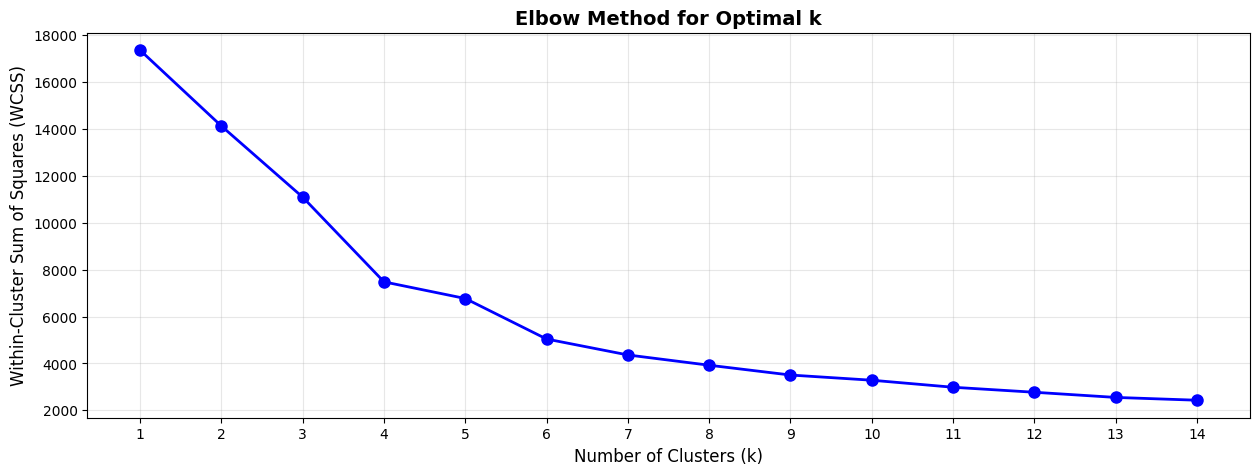

In [64]:
# Plot Elbow Curve
plt.figure(figsize=(15, 5))

plt.plot(k_range, inertia, 'bo-', linewidth=2, markersize=8)
plt.title('Elbow Method for Optimal k', fontsize=14, fontweight='bold')
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Within-Cluster Sum of Squares (WCSS)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(k_range)

([<matplotlib.axis.XTick at 0x1b6ed338c50>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14')])

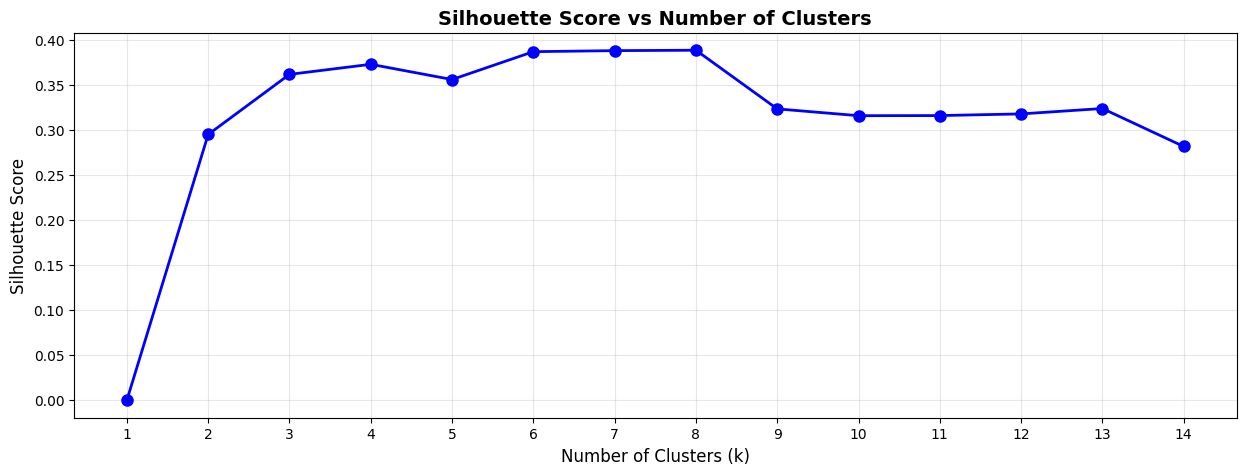

In [65]:
# Plot Silhouette Scores
plt.figure(figsize=(15, 5))
plt.plot(k_range, silhouette_scores, 'bo-', linewidth=2, markersize=8)
plt.title('Silhouette Score vs Number of Clusters', fontsize=14, fontweight='bold')
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(k_range)

In [ ]:
# The best k from KMeans are 4

<h1> Apply DBSCAN </h1>

In [94]:
# Run DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=3)
labels = dbscan.fit_predict(X_scaled)

In [95]:
len(set(labels))  # Number of clusters found (including noise if any)

4

In [96]:
pd.Series(labels).value_counts()

 0    4311
-1      15
 2       9
 1       3
Name: count, dtype: int64

In [ ]:
# from DBSCAN we can say that we have 4 clusters

<h1> Final Model </h1>

In [102]:
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(X_scaled)
labels

array([2, 0, 0, ..., 1, 1, 1])

In [99]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

In [101]:
df_pca = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2', 'PCA3'])
df_pca['Cluster'] = labels.astype(str)  
df_pca

,PCA1,PCA2,PCA3,Cluster
0,-1.280345,-1.919404,1.844157,2
1,1.157533,-1.627072,-0.677323,0
2,0.051932,-1.691977,-0.328210,0
3,0.080412,-1.661562,-0.896762,0
4,-1.160084,-1.904825,1.722065,2
...,...,...,...,...
4333,-1.246607,1.551818,1.668593,2
4334,-0.933139,1.635863,0.754074,1
4335,-0.226689,1.789311,-0.823284,1
4336,1.472331,1.857656,-0.265708,1


In [104]:
fig = px.scatter_3d(
    df_pca, 
    x='PCA1', y='PCA2', z='PCA3',
    color='Cluster',
    title="3D KMeans Clusters (PCA Projection)",
    opacity=0.7
)
fig.show()

In [105]:
rfm["Cluster"] = labels
rfm

,CustomerID,Recency,Frequency,Monetary,Cluster
0,12346.0,326,1,35.40,2
1,12347.0,2,7,3646.97,0
2,12348.0,75,4,960.68,0
3,12349.0,19,1,1388.60,0
4,12350.0,310,1,329.80,2
...,...,...,...,...,...
4333,18280.0,278,1,180.60,2
4334,18281.0,181,1,80.82,1
4335,18282.0,8,2,178.05,1
4336,18283.0,4,16,2320.35,1


In [107]:
rfm["Cluster"].value_counts()

Cluster
1    1696
0    1661
2     966
3      15
Name: count, dtype: int64

In [110]:
cluster_means = rfm.groupby('Cluster').mean(numeric_only=True)
cluster_means

,CustomerID,Recency,Frequency,Monetary
Cluster,,,,
0,13768.618904,44.361228,4.853703,1535.280259
1,16813.652712,46.849646,4.554245,1214.297647
2,15285.870600,256.972050,1.504141,356.778561
3,14759.200000,3.133333,86.200000,35222.696667


In [112]:
cluster_summary = rfm.groupby('Cluster').agg(['mean', 'median', 'min', 'max'])
cluster_summary

CustomerID                                Recency                   \
                 mean   median      min      max        mean median  min  max   
Cluster                                                                         
0        13768.618904  13758.0  12347.0  15615.0   44.361228   30.0    1  190   
1        16813.652712  16828.5  15243.0  18287.0   46.849646   33.0    1  206   
2        15285.870600  15263.5  12346.0  18280.0  256.972050  254.0  127  374   
3        14759.200000  14298.0  12748.0  18102.0    3.133333    2.0    1   10   

         Frequency                      Monetary                      \
              mean median min  max          mean     median      min   
Cluster                                                                
0         4.853703    3.0   1   57   1535.280259    830.950     6.33   
1         4.554245    3.0   1   63   1214.297647    667.555     7.98   
2         1.504141    1.0   1   34    356.778561    256.110     3.75   
3        86.200000   73.0  17  209  35222.696667  29395.020  7171.44   

                    
               max  
Cluster             
0         23054.44  
1         16397.16  
2          5029.94  
3        109459.04

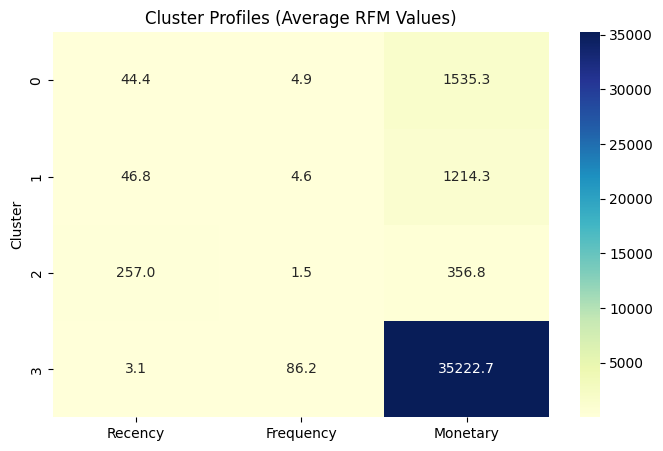

In [118]:
cluster_stats = rfm.groupby('Cluster')[['Recency','Frequency','Monetary']].mean()

plt.figure(figsize=(8,5))
sns.heatmap(cluster_stats, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("Cluster Profiles (Average RFM Values)")
plt.show()


# 📊 Cluster Profiles  

---

## 🔹 Cluster 0
- **Recency:** ~44 days (recent buyers, active customers)  
- **Frequency:** ~5 purchases (moderate repeaters)  
- **Monetary:** ~1535 total spend (medium spenders)  
- **Interpretation:** 🟢 **Loyal Mid-Tier Customers** – they shop somewhat often and spend a reasonable amount.  

---

## 🔹 Cluster 1
- **Recency:** ~47 days (also fairly recent)  
- **Frequency:** ~4.5 purchases (moderate repeaters)  
- **Monetary:** ~1214 spend (lower than Cluster 0)  
- **Interpretation:** 🟡 **Regular but Lower-Spending Customers** – similar behavior to Cluster 0 but spend less overall.  

---

## 🔹 Cluster 2
- **Recency:** ~257 days (haven’t purchased in a long time)  
- **Frequency:** ~1.5 purchases (almost one-time buyers)  
- **Monetary:** ~357 spend (low)  
- **Interpretation:** 🔴 **At-Risk / Lost Customers** – old customers with low engagement and low spend.  

---

## 🔹 Cluster 3
- **Recency:** ~3 days (very recent purchases)  
- **Frequency:** ~86 purchases (extremely frequent)  
- **Monetary:** ~35,223 spend (highest)  
- **Interpretation:** 🌟 **VIP Customers** – recent, highly frequent, and extremely valuable.  

---

# 🧭 Final Business Insights
- **Cluster 3 (VIPs):** Keep them happy → loyalty rewards, exclusive offers.  
- **Cluster 0 (Mid-Tier Loyal):** Encourage upsell/cross-sell to move them toward VIP.  
- **Cluster 1 (Regular Low Spenders):** Offer bundles/discounts to increase spending.  
- **Cluster 2 (At-Risk):** Send win-back campaigns (emails, reactivation offers).  
